3.

In [43]:
import pandas as pd

df = pd.read_csv("task3_dataset.csv")
#a
num_rows, num_cols = df.shape

print("no. of rows:", num_rows)
print("no. of columns:", num_cols)

#b
print("\ndata types of each column: ")
print(df.dtypes)

#c
if "Level" in df.columns:
    target_variable = "Level"
    print("\ntarget variable for supervised learning:", target_variable)
else:
    print("\ntarget variable not found. please specify.")


no. of rows: 1005
no. of columns: 27

data types of each column: 
index                         int64
Patient Id                   object
Age                           int64
Gender                        int64
Air Pollution                 int64
Alcohol use                   int64
Dust Allergy                float64
OccuPational Hazards          int64
Genetic Risk                float64
chronic Lung Disease         object
Balanced Diet               float64
Obesity                     float64
Smoking                     float64
Passive Smoker              float64
Chest Pain                  float64
Coughing of Blood           float64
Fatigue                     float64
Weight Loss                  object
Shortness of Breath         float64
Wheezing                    float64
Swallowing Difficulty         int64
Clubbing of Finger Nails    float64
Frequent Cold                 int64
Dry Cough                     int64
Snoring                       int64
Snoring.1                     int6

4.

In [42]:
missing = df.isnull().sum()
print("\nmissing values in each column:")
print(missing[missing > 0])

numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()))
print("\nmissing values have been imputed.")

print("\ndataset after imputation:")
print(df.head())


missing values in each column:
Series([], dtype: int64)

missing values have been imputed.

dataset after imputation:
   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4           5.0   
1      1        P10   17       1              3            1           5.0   
2      2       P100   35       1              4            5           6.0   
3      3      P1000   37       1              7            7           7.0   
4      4       P101   46       1              6            8           7.0   

   OccuPational Hazards  Genetic Risk chronic Lung Disease  ...  Weight Loss  \
0                     4           3.0                    2  ...         Yes    
1                     3           4.0                    2  ...         Yes    
2                     5           5.0                    4  ...         Yes    
3                     7           6.0                    7  ...         Yes    
4           

5.

In [11]:
useless_cols = [col for col in df.columns if df[col].nunique() == 1]
df.drop(columns = useless_cols, inplace=True)
print("\ndropped useless columns:", useless_cols)

print(df.head())


dropped useless columns: []
   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4           5.0   
1      1        P10   17       1              3            1           5.0   
2      2       P100   35       1              4            5           6.0   
3      3      P1000   37       1              7            7           7.0   
4      4       P101   46       1              6            8           7.0   

   OccuPational Hazards  Genetic Risk chronic Lung Disease  ...  Weight Loss  \
0                     4           3.0                    2  ...         Yes    
1                     3           4.0                    2  ...         Yes    
2                     5           5.0                    4  ...         Yes    
3                     7           6.0                    7  ...         Yes    
4                     7           7.0                    6  ...         Yes    

   Shortness of Breat

6.

In [13]:
unique_levels = df["Level"].unique()
print("unique categories in 'Level':", unique_levels)

unique categories in 'Level': ['Low' 'Medium' 'High']


7.

In [14]:
level_counts = df["Level"].value_counts()
print("\nclass distribution:")
print(level_counts)

imbalance_ratio = level_counts.max() / level_counts.min()
print("\nimbalance ratio:", imbalance_ratio)
if imbalance_ratio > 1.5:
    print("dataset is imbalanced.")
else:
    print("dataset is balanced.")



class distribution:
Level
High      370
Medium    332
Low       303
Name: count, dtype: int64

imbalance ratio: 1.221122112211221
dataset is balanced.


8.

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
categorical_features.remove("Level")

label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\ncategorical features encoded using label encoding:", categorical_features)


categorical features encoded using label encoding: ['Patient Id', 'chronic Lung Disease', 'Weight Loss']


9.

In [17]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print("\nno. of duplicate records:", num_duplicates)

if num_duplicates > 0:
    df = df.drop_duplicates()
    print("duplicate records removed.")
else:
    print("unable to find duplicate records.")


no. of duplicate records: 0
unable to find duplicate records.


10.

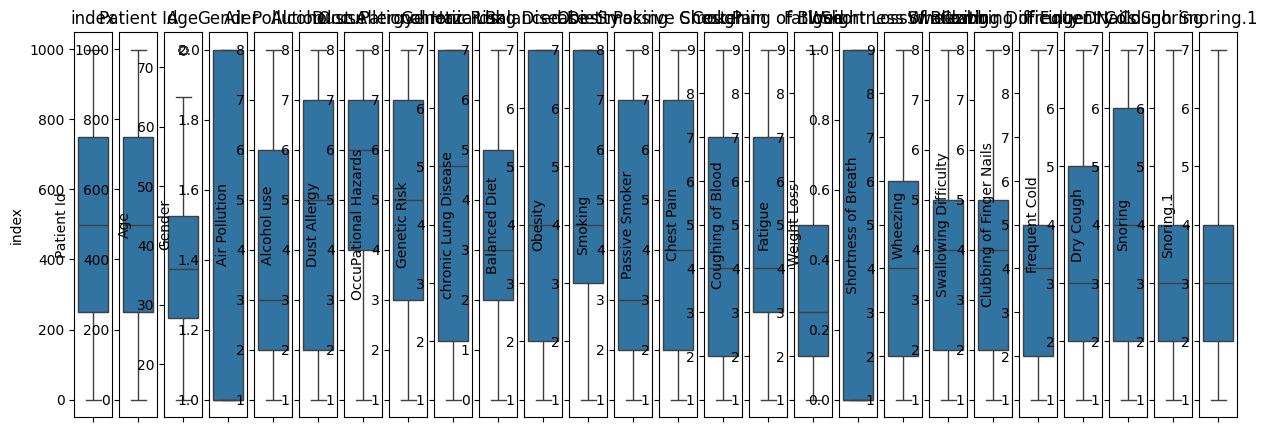

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

numerical_features = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.show()

z_scores = np.abs(stats.zscore(df[numerical_features]))
df = df[(z_scores < 3).all(axis=1)]

11.

In [23]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower().str.strip()



12.

In [24]:
if 'age' in df.columns:
    df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 60, np.inf],
                             labels=['child', 'young_adult', 'adult', 'senior'])

13.

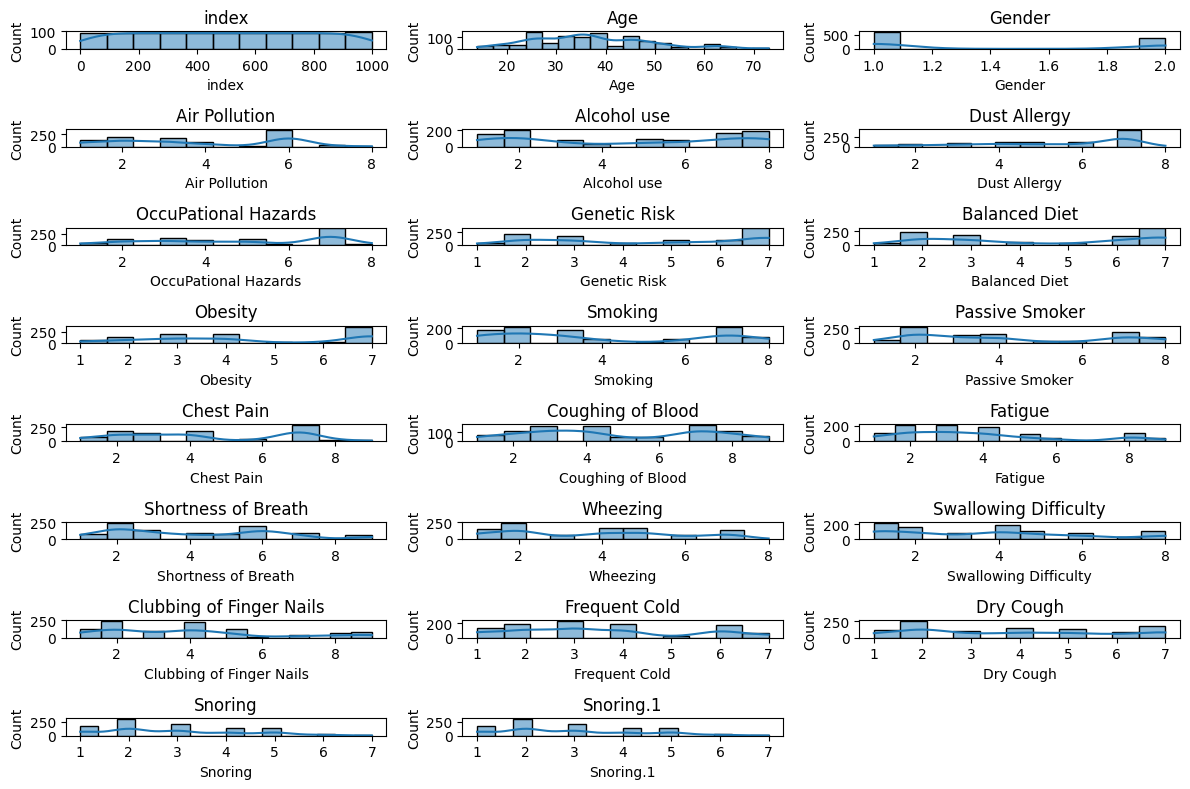

skewness of numerical features:
 index                      -0.000986
Age                         0.551921
Gender                      0.400394
Air Pollution               0.120273
Alcohol use                -0.024426
Dust Allergy               -0.654758
OccuPational Hazards       -0.241809
Genetic Risk               -0.132564
Balanced Diet              -0.075388
Obesity                     0.017495
Smoking                     0.373819
Passive Smoker              0.401088
Chest Pain                  0.154870
Coughing of Blood           0.115418
Fatigue                     0.856737
Shortness of Breath         0.404999
Wheezing                    0.226546
Swallowing Difficulty       0.447088
Clubbing of Finger Nails    0.789140
Frequent Cold               0.401694
Dry Cough                   0.221354
Snoring                     0.551097
Snoring.1                   0.551097
dtype: float64

scaled Data (first 5 rows):
       index       Age    Gender  Air Pollution  Alcohol use  Dust Aller

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
for i, column in enumerate(df_numeric.columns, 1):
    plt.subplot(len(df_numeric.columns) // 3 + 1, 3, i)
    sns.histplot(df_numeric[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()
skewness = df_numeric.skew()
print("skewness of numerical features:\n", skewness)

scaler = StandardScaler() if all(abs(skewness) < 1) else MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)
print("\nscaled Data (first 5 rows):\n", df_scaled.head())

14.

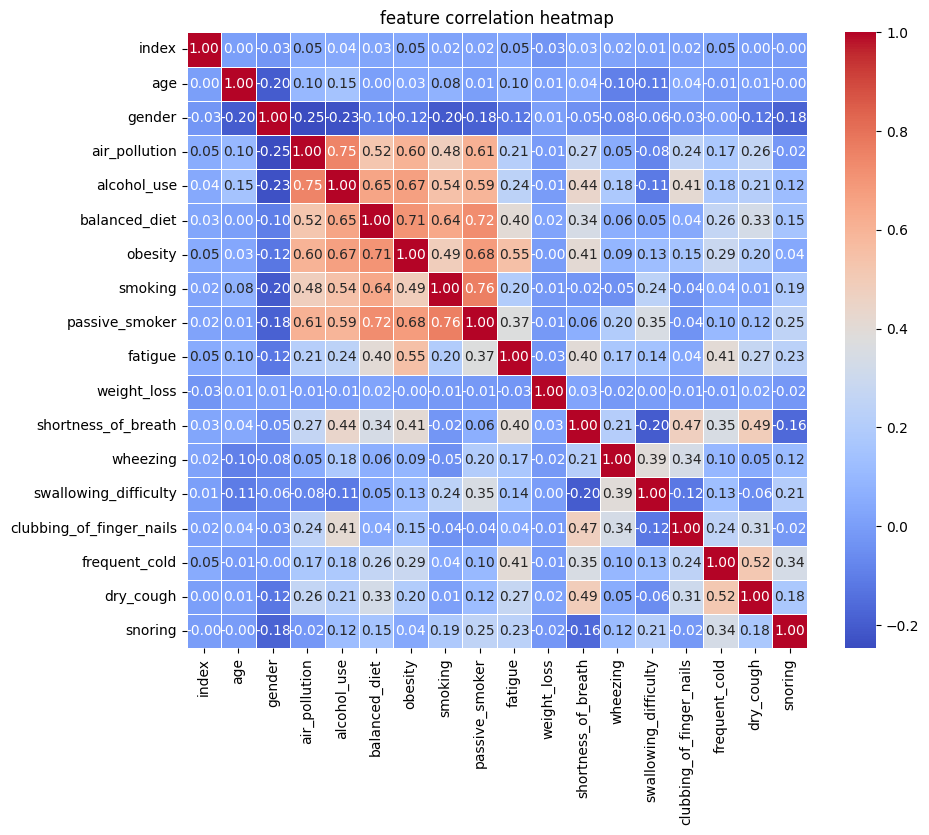

In [37]:
df_numeric = df.select_dtypes(include=['number'])

corr = df_numeric.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("feature correlation heatmap")
plt.show()

15.

In [38]:
threshold = 0.8
corr_matrix = corr.abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
df = df.drop(columns=to_drop)

print("final selected features:", df.columns)

final selected features: Index(['index', 'age', 'gender', 'air_pollution', 'alcohol_use',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'fatigue',
       'weight_loss', 'shortness_of_breath', 'wheezing',
       'swallowing_difficulty', 'clubbing_of_finger_nails', 'frequent_cold',
       'dry_cough', 'snoring', 'level', 'age_group'],
      dtype='object')
